In [44]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from nltk import word_tokenize
import re
import string

%matplotlib inline

### Import data

In [2]:
df = pd.read_csv("../data/corpus_train.csv", sep="|")

In [3]:
df.head()

,paragraph,author
0,Beaucoup de gens ont envié la douce existence ...,Balzac
1,"Un mercredi, de grand matin, vers le milieu du...",Balzac
2,"--Ah! c'est toi, Suzanne? dit le chevalier de ...",Balzac
3,"Cette charmante Suzanne, dont la comique avent...",Balzac
4,"Suzanne, une de ses favorites, spirituelle, am...",Balzac


In [4]:
df.shape

(47202, 2)

### Distribution of the authors in the database

<BarContainer object of 10 artists>

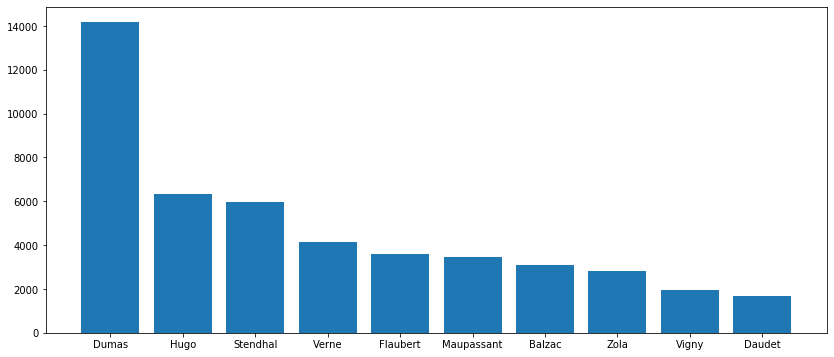

In [30]:
count = Counter(df['author']).most_common()

x = [t[0] for t in count]
y = [t[1] for t in count]

plt.figure(figsize=(14, 6))
plt.bar(x=x, height=y)

### Length of paragraphs

Statistics on the length of paragraphs

In [31]:
df['paragraph'].apply(len).describe()

count    47202.000000
mean       366.902737
std        469.902017
min        101.000000
25%        151.000000
50%        232.000000
75%        408.000000
max      16283.000000
Name: paragraph, dtype: float64

In [32]:
df.groupby('author')

### New features
- length of paragraph
- number of tokens
- number of sentences
- average number of words per sentence
- number of different words
- number of punctuation tokens
- relative number of punctuation tokens among all tokens

In [41]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\margo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [35]:
par = df['paragraph'][0]

In [45]:
par_tokens = word_tokenize(par)

In [54]:
par_tokens

['Beaucoup',
 'de',
 'gens',
 'ont',
 'envié',
 'la',
 'douce',
 'existence',
 'de',
 'ce',
 'vieux',
 'garçon',
 ',',
 'pleine',
 'de',
 'parties',
 'de',
 'boston',
 ',',
 'de',
 'trictrac',
 ',',
 'de',
 'reversi',
 ',',
 'de',
 'whist',
 'et',
 'de',
 'piquet',
 'bien',
 'jouées',
 ',',
 'de',
 'dîners',
 'bien',
 'digérés',
 ',',
 'de',
 'prises',
 'de',
 'tabac',
 'humées',
 'avec',
 'grâce',
 ',',
 'de',
 'tranquilles',
 'promenades',
 '.',
 'Presque',
 'tout',
 'Alençon',
 'croyait',
 'cette',
 'vie',
 'exempte',
 "d'ambition",
 'et',
 "d'intérêts",
 'graves',
 ';',
 'mais',
 'aucun',
 'homme',
 'n',
 "'",
 'a',
 'une',
 'vie',
 'aussi',
 'simple',
 'que',
 'ses',
 'envieux',
 'la',
 'lui',
 'font',
 '.',
 'Vous',
 'découvrirez',
 'dans',
 'les',
 'villages',
 'les',
 'plus',
 'oubliés',
 'des',
 'mollusques',
 'humains',
 ',',
 'des',
 'rotifères',
 'en',
 'apparence',
 'morts',
 ',',
 'qui',
 'ont',
 'la',
 'passion',
 'des',
 'lépidoptères',
 'ou',
 'de',
 'la',
 'conchyliol

In [53]:
sum([[i for i in string.punctuation][x] in par_tokens for x in range(0, len(string.punctuation))])

5

In [ ]:
#def get_length(paragraph):
 #   return len(paragraph)

def get_features(paragraph):
    tokens = word_tokenize(paragraph)
    sentences = paragraph.split('.')
    
    len_paragraph = len(paragraph)
    nb_tokens = len(tokens)
    nb_sentences = len(sentences)
    nb_punct = sum(i for i in tokens)

### Name entities recognition